In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import csv

/Users/thomasbourke/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def fractal_sorter(fractal_data):
    #convert each set of data to numpy array
    rawNumParticles = fractal_data.numParticles.to_numpy()
    rawClusterRadius = fractal_data.clusterRadius.to_numpy()


    #array of indexes of where a new fractal starts
    sliceNum = 10
    where_isTen = np.where(rawNumParticles == sliceNum)

    #initialise empty array to store each fractal
    previousIndex = 0
    slicedNumParticles = []
    slicedClusterRadius = []

    #slices fractal data up
    for i in where_isTen[0]:

        temp_numParticles = rawNumParticles[previousIndex: i]
        temp_ClusterRadius = rawClusterRadius[previousIndex: i]
        
        slicedNumParticles.append(temp_numParticles)
        slicedClusterRadius.append(temp_ClusterRadius)

        previousIndex = i
        
    #appends final fractal data
    slicedNumParticles.append(rawNumParticles[previousIndex:])
    slicedClusterRadius.append(rawClusterRadius[previousIndex:])

    #gets rid of 0th row that was empty
    slicedNumParticles = slicedNumParticles[1:]
    slicedClusterRadius = slicedClusterRadius[1:]
    
    return slicedNumParticles, slicedClusterRadius

def getAverage(particleList, radiusList):
    numFractals = len(particleList)
    numValues = len(radiusList[0])
    meanSizes = np.zeros(numValues)
    meanSquareSizes = np.zeros(numValues)
    SizeErrors = np.zeros(numValues)
    ln_errors = []
    
    #calculates average clusterRadius
    for i in range(numFractals):
        for j in range(numValues):
            meanSizes[j] += radiusList[i][j]/numFractals
            meanSquareSizes[j] += (radiusList[i][j]**2)/numFractals

    for k in range(numValues):
        SizeErrors[k] += (1/np.sqrt(numFractals-1)) * np.sqrt(meanSquareSizes[k] - meanSizes[k]**2)
        #print(SizeErrors[k])
        
    for l in range(numValues):
        ln_errors.append(SizeErrors[l] / meanSizes[l])
            
    return meanSizes, ln_errors

#create line of best fits to calculate gradient
def best_fit(x, slope , intercept):
    return slope*x + intercept

In [24]:
prob1_data = pd.DataFrame(pd.read_csv("data/prob1_data.csv", dtype=np.float64))

#probability = 1 data processed
p1_numParticles = fractal_sorter(prob1_data)[0]
p1_clusterRadius = fractal_sorter(prob1_data)[1]
p1_meanSize = getAverage(p1_numParticles, p1_clusterRadius)[0]

p1_ln_numParticles = np.log(p1_numParticles)[0]
p1_ln_clusterRadius = np.log(p1_meanSize)
p1_clusterRadius_err = getAverage(p1_numParticles, p1_clusterRadius)[1]

p1_data = [p1_ln_numParticles, p1_ln_clusterRadius, p1_clusterRadius_err]


In [26]:
prob075_data = pd.DataFrame(pd.read_csv("data/prob075_data.csv", dtype=np.float64))

#probability = 75% data processed
p075_numParticles = fractal_sorter(prob075_data)[0]
p075_clusterRadius = fractal_sorter(prob075_data)[1]
p075_meanSize = getAverage(p075_numParticles, p075_clusterRadius)[0]

p075_ln_numParticles = np.log(p075_numParticles)[0]
p075_ln_clusterRadius = np.log(p075_meanSize)
p075_clusterRadius_err = getAverage(p075_numParticles, p075_clusterRadius)[1]

p075_data = [p075_ln_numParticles, p075_ln_clusterRadius, p075_clusterRadius_err]

In [32]:
prob050_data = pd.DataFrame(pd.read_csv("data/prob050_data.csv", dtype=np.float64))

#probability = 50% data processed
p050_numParticles = fractal_sorter(prob050_data)[0]
#p050_clusterRadius = fractal_sorter(prob050_data)[1]
#p050_meanSize = getAverage(p050_numParticles, p050_clusterRadius)[0]

#p050_ln_numParticles = np.log(p050_numParticles)[0]
#p050_ln_clusterRadius = np.log(p050_meanSize)
#p050_clusterRadius_err = getAverage(p050_numParticles, p050_clusterRadius)[1]


In [42]:
p050_numParticles[7]

IndexError: list index out of range

In [29]:
prob050_data

,numParticles,clusterRadius
0,10.0,3.0
1,20.0,6.0
2,30.0,7.0
3,40.0,8.0
4,50.0,10.0
...,...,...
687,960.0,50.0
688,970.0,50.0
689,980.0,51.0
690,990.0,51.0


Fractal dimension = 1.6415821862405293±0.006693145351206477


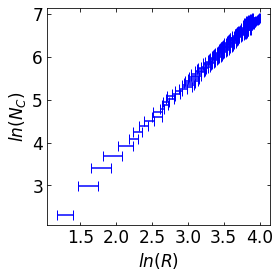

In [23]:
#plotting

fig, ax = plt.subplots(figsize=(4,4))  

font = 17

#graph formatting
#ax.set_xlabel("Fractal size / logarithmic", fontsize=font)
#ax.set_ylabel("Particle count / logarithmic", fontsize=font)

ax.set_xlabel("$ln(R)$", fontsize=font)
ax.set_ylabel("$ln(N_C)$", fontsize=font)

plt.xticks(fontsize=font)                 
plt.yticks(fontsize=font) 
plt.tick_params(axis='both', which='both', direction='in', top=True, right=True) 

#calculating fractal dimension
popt, pcov = curve_fit(best_fit, p1_ln_clusterRadius, p1_ln_numParticles)
fracdim = popt[0]    
fracdim_err = np.sqrt(np.diag(pcov))[0]

print(f"Fractal dimension = {fracdim}±{fracdim_err}")

ax.errorbar(p1_ln_clusterRadius, p1_ln_numParticles, yerr=None, xerr=p1_clusterRadius_err, color='blue', linestyle='', capsize=5)

#ax.errorbar(oneK_log_raddii, oneK_log_numParticles, yerr=None, xerr=oneK_errors, color='red')

plt.show()